<a href="https://colab.research.google.com/github/Saihritesh/Machine-Learning-/blob/main/Tenserflow_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,Y_train),(X_dev,Y_dev)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
Y_train=Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
Y_dev[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [5]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [6]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

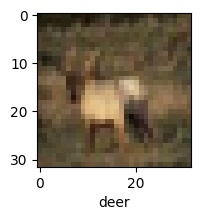

In [7]:
plot_sample(X_train,Y_train,3)

In [8]:
X_train=X_train/255
X_dev=X_dev/255

In [ ]:
ann =models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')


])
ann.compile(optimizer='SGD',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
ann.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.0992 - loss: 2.3027
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 82ms/step - accuracy: 0.0994 - loss: 2.3027
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 84ms/step - accuracy: 0.0987 - loss: 2.3026
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 84ms/step - accuracy: 0.0953 - loss: 2.3027
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 88ms/step - accuracy: 0.0994 - loss: 2.3027


In [9]:
CNN =models.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')


])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
CNN.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
CNN.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 33ms/step - accuracy: 0.7169 - loss: 0.8175
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.7264 - loss: 0.7856
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.7415 - loss: 0.7416
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.7543 - loss: 0.7040
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.7670 - loss: 0.6697
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.7798 - loss: 0.6335
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.7857 - loss: 0.6073
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.7989 - loss: 0.5750
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.8023 - loss: 0.5583
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8149 - loss: 0.5262


In [13]:
CNN.evaluate(X_dev,Y_dev)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6941 - loss: 0.9838


[0.9981299042701721, 0.6881999969482422]

In [15]:
Y_dev=Y_dev.reshape(-1,)

In [16]:
Y_dev

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

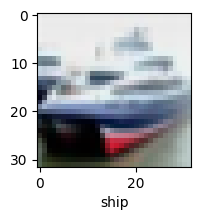

In [17]:
plot_sample(X_dev,Y_dev,1)

In [20]:
Y_pred=CNN.predict(X_dev)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [21]:
Y_pred

array([[8.17933702e-04, 3.52016614e-05, 2.34651621e-02, ...,
        1.14936403e-04, 4.92236065e-03, 2.62741878e-07],
       [2.24780117e-04, 3.13009531e-03, 8.23236874e-08, ...,
        7.01254332e-11, 9.96534467e-01, 1.10482324e-04],
       [8.61683339e-02, 4.36200686e-02, 1.26259541e-03, ...,
        4.52564796e-04, 7.98206031e-01, 6.28964007e-02],
       ...,
       [7.35526510e-06, 2.33614543e-07, 2.64628887e-01, ...,
        1.24323346e-01, 1.03354196e-05, 3.87583759e-06],
       [4.37157834e-03, 2.23433390e-01, 4.36367057e-02, ...,
        7.08455732e-03, 9.02857664e-06, 1.37769314e-03],
       [7.00706559e-09, 3.53302887e-10, 1.86431180e-07, ...,
        9.99497831e-01, 2.94388763e-10, 1.35911962e-10]], dtype=float32)

In [22]:
Y_classes=[np.argmax(element) for element in Y_pred]

In [24]:
Y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [25]:
Y_dev[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Here we can clearly see that there is are some matches happening between the Dev set and the Training set